# Story-Telling and visulization

This notebook is created for practicing the story-telling and visulization skills

The dataset used here is download from Kaggel.
Here is the link: https://www.kaggle.com/wenruliu/adult-income-dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. 'Adult.csv' is a public dataset for income. It is widely used for KNN modeling. In this exercise, I am going to use this dataset to do exploratory data analysis and generate several visulization plots.

## Tabel Content
* 1.0 Problem Statement
* 2.0 Import tools
* 3.0 Load dataset
* 4.0 Exploratory data analysis
* 5.0 Conclusion

## 1.0 Problem Statement

## 2.0 Import tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 3.0 Load the dataset for visulization

In [2]:
data = pd.read_csv('./data/adult.csv')

Now let have a quick look at the data.

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Check for any missing value. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Let's look at the statistics of numerial features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


#### Quick summary on the initial look at the the data:
This dataset contains 48842 individuals and 15 features. The missing data was replaced with "?" for some category features. Out of 15 features, 6 numerial features and 9 category features are included. 

The 'income' column is categorical. It is divided into two buckets: <=50k and >50k. 

Take age for example, the minimum age is 17 and maximum 90, with 38 as mean.

I don't quite understand what "fnlwgt" is. It is ok. I will try to find it out during the EDA.

Since the dataset has some missing value, we will have a data cleaning step.

## 4.0 Data Cleaning

3 categorical features have "?" values. They are "workclass", "occupation", and "native-country". One way of handling missing value is replace it with the most frequent value. We will do this to "workclass" and "native-country" since one value of each has a dominating count. However, "occupation" doesn't have this similar behave. I will create a new value "other".

In [6]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
print("workclass has :", attrib, counts)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass']=='?'] = most_freq_attrib
print()

attrib, counts = np.unique(data['native-country'], return_counts = True)
print("native-country has :", attrib, counts)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country']=='?'] = most_freq_attrib
print()

attrib, counts = np.unique(data['occupation'], return_counts = True)
print("occupation has :", attrib, counts)
data['occupation'][data['occupation']=='?'] = "unknown" 

workclass has : ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay'] [ 2799  1432  3136    10 33906  1695  3862  1981    21]

native-country has : ['?' 'Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia'] [  857    28   182   122    85   138   103    45   155   127    38   206
    49    88    75     1    20    30    19   151    59    37   105   106
    92    23   951    49    23    46   295    87    67   184    21   115
    65    30    27 43832    86    23]

occupation has : ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-re

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# check the values for label "income"
attrib, counts = np.unique(data['income'], return_counts = True)
print(attrib, counts)

['<=50K' '>50K'] [37155 11687]


In [9]:
# The income columns is a classification with income <=50k and >50k. We map <=50k to be 0 and >50k 1. 
data['income'] = data['income'].map({"<=50K": 0, ">50K": 1})

In [10]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,0


Now the data is in a good shape. Next step is EDA. I will generate a lot of plots to explore the data.

## 5.0 Exploratory data analysis

### 5.1 Numerial features

In [29]:
df_num = data.select_dtypes(include=[np.number])
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


In [30]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0
income,48842.0,0.239282,0.426649,0.0,0.0,0.0,0.0,1.0


In [31]:
df_num['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [32]:
df_num['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

The majority of both "capital-gain" and "capital-loss" are zeros. And "capital-gain" got 244 of 99999, which is very suspicious. They are very less useful. They will be dropout for further analysis and modeling if there is one.

At first, let's look at the income data alone

In [33]:
# The percentage of income <=50K
pct_less_50k = 100*(df_num['income']==0).sum()/len(df_num.income)

# The percentage of income >50K
pct_more_50k = 100*(df_num['income']==1).sum()/len(df_num.income)

print("The percentage of income <=50K is: ", round(pct_less_50k, 1))
print("The percentage of income >50K is: ", round(pct_more_50k, 1))

The percentage of income <=50K is:  76.1
The percentage of income >50K is:  23.9


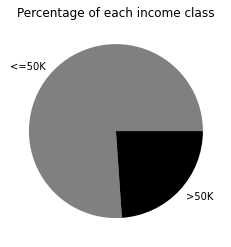

In [34]:
# Plot a pie plot to show the percentage for each income class
labels = '<=50K', '>50K'
sizes = [76.1, 23.9]
colors=['grey', 'black']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors)
plt.title("Percentage of each income class")
plt.show()

In [35]:
features_num = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']

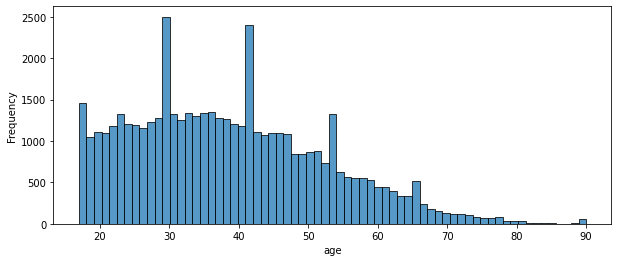

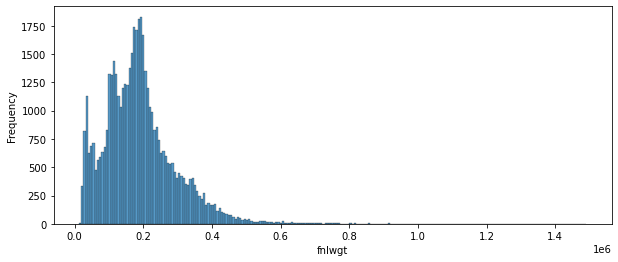

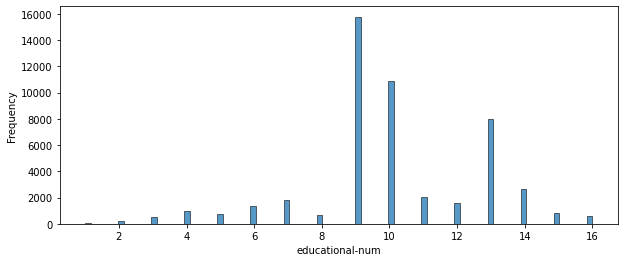

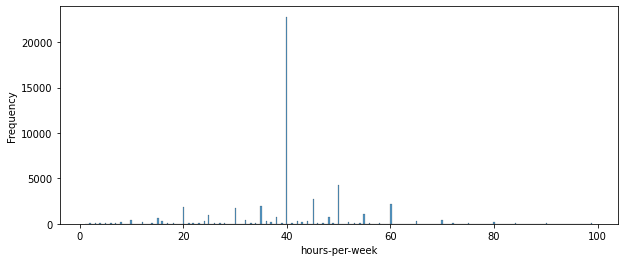

In [38]:
for fea in features_num: 
    plt.figure(figsize=(10, 4))
    total = float(len(data) )
    
    ax = sns.histplot(x=fea, data=data)
    plt.xlabel(fea)
    plt.ylabel("Frequency")
    plt.show()

In [39]:
# Devide the datafrme into two. One (df1) is for the income class of <=50k, and the other (df2) for >50k. 
df1 = df_num[df_num.income == 0]
df2 = df_num[df_num.income == 1]

In [40]:
# Statistics for class of income <=50k
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37155.0,36.872184,14.104118,17.0,25.0,34.0,46.0,90.0
fnlwgt,37155.0,190039.565523,106577.604741,12285.0,117210.0,178811.0,238917.0,1490400.0
educational-num,37155.0,9.598493,2.437673,1.0,9.0,9.0,10.0,16.0
capital-gain,37155.0,147.010308,936.753678,0.0,0.0,0.0,0.0,41310.0
capital-loss,37155.0,54.151931,313.320005,0.0,0.0,0.0,0.0,4356.0
hours-per-week,37155.0,38.840048,12.356849,1.0,35.0,40.0,40.0,99.0
income,37155.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
# Statistics for class of income >50k
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11687.0,44.275178,10.558983,19.0,36.0,43.0,51.0,90.0
fnlwgt,11687.0,188470.574570,102442.731958,13769.0,118942.5,176729.0,233505.0,1226583.0
educational-num,11687.0,11.602807,2.382624,1.0,10.0,12.0,13.0,16.0
capital-gain,11687.0,4042.239497,14756.771034,0.0,0.0,0.0,0.0,99999.0
capital-loss,11687.0,193.528964,593.211612,0.0,0.0,0.0,0.0,3683.0
hours-per-week,11687.0,45.452896,11.091176,1.0,40.0,40.0,50.0,99.0
income,11687.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


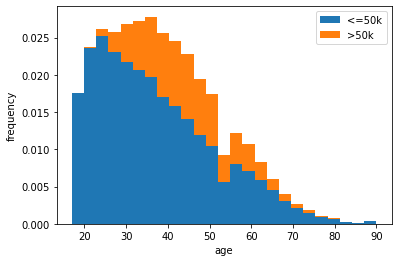

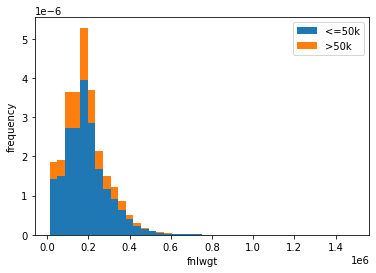

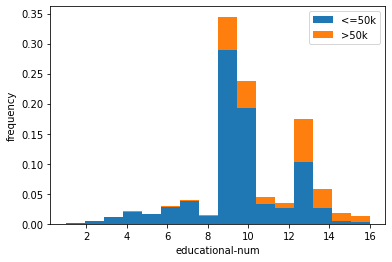

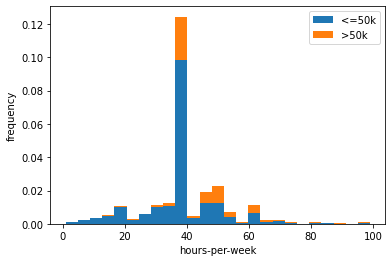

In [42]:
plt.figure(figsize=(6,4))
plt.hist([df1.age,df2.age], bins=25, stacked=True, density=True, label=['<=50k', '>50k'])
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.hist([df1.fnlwgt,df2.fnlwgt], bins=40, stacked=True, density=True, label=['<=50k', '>50k'])
plt.xlabel('fnlwgt')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.hist([df1['educational-num'], df2['educational-num']], bins=16, stacked=True, density=True, label=['<=50k', '>50k'])
plt.xlabel('educational-num')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.hist([df1['hours-per-week'], df2['hours-per-week']], bins=25, stacked=True, density=True, label=['<=50k', '>50k'])
plt.xlabel('hours-per-week')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [43]:
#df_num['educational-num'].value_counts(ascending=True)

In [44]:
#df_num['hours-per-week'].value_counts(ascending=True)

In [45]:
#df_num['age'].min()

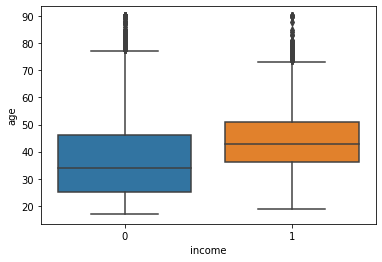

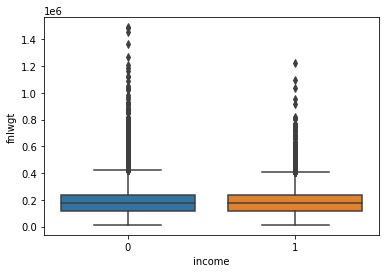

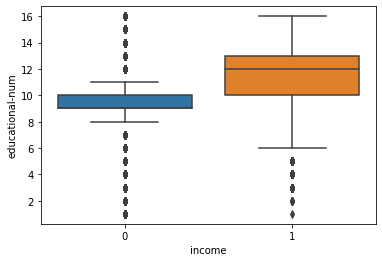

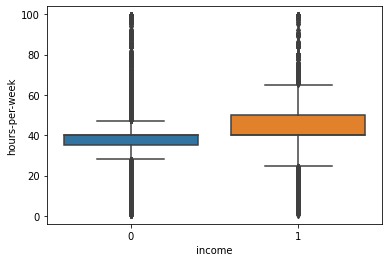

In [46]:
features_num = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']
for fea in features_num:
    fig = plt.figure(figsize=(6, 4))
    sns.boxplot(x="income", y=fea, data=data)
    plt.show()

#### Quick summary:
The average age for class of income <=50k is around 34 while that for the other class around 43.

'fnlwgt' is not making difference regarding people's income.

'educational-num' is averaged around 9 for class of income <=50k and 12 for the other class.

The high income group tends to work more hours weekly by average.

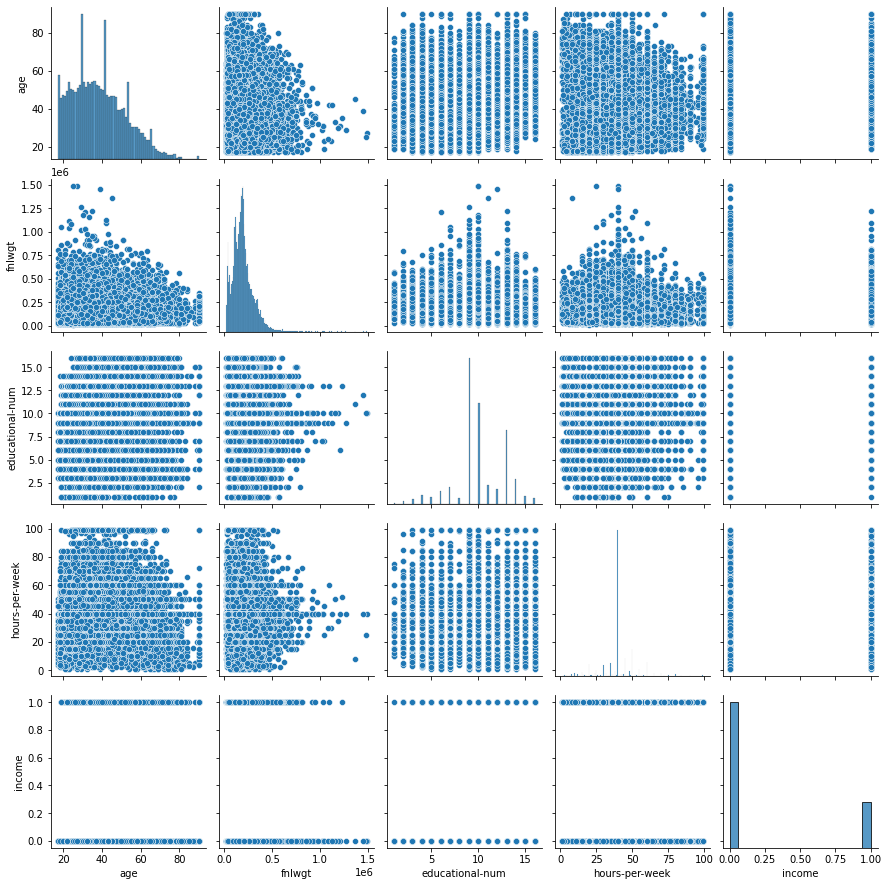

In [54]:
# generate the pairplot to check the relationships
df = df_num[['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'income']]
sns.pairplot(df);

The pairplot is not as informational as the plots before. 

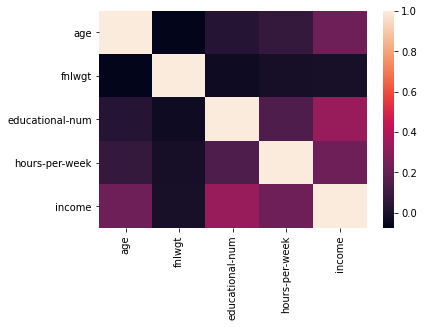

In [55]:
sns.heatmap(df.corr());

The heatmap of correlation shows that fnlwgt has no correlation with other features, including "income".

"educational-num" and "age" have some correlation with "income"

"hours-per-week" has week correlation with "income"

### 5.2 Categorical features

In [68]:
df_cat = data.select_dtypes(include=['object'])
df_cat['income'] = data['income']
df_cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,Private,Some-college,Never-married,unknown,Own-child,White,Female,United-States,0


The "education" is repeating the "educational-num". For the anaysis purpose, I am going to drop it here. But it will be used for modeling if needed since it has impact on income.

#attrib, counts = np.unique(data['education'], return_counts = True)
#print("education has :", attrib, counts) 

In [69]:
attrib, counts = np.unique(data['native-country'], return_counts = True) 
print("native-country has :", attrib, counts)

native-country has : ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia'] [   28   182   122    85   138   103    45   155   127    38   206    49
    88    75     1    20    30    19   151    59    37   105   106    92
    23   951    49    23    46   295    87    67   184    21   115    65
    30    27 44689    86    23]


The "native-country" here is mostly for 'United-States'. It is not much useful for analysis and modeling. I am going to drop it. 

In [70]:
attrib, counts = np.unique(data['occupation'], return_counts = True) 
print("occupation has :", attrib, counts)

occupation has : ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving' 'unknown'] [5611   15 6112 6086 1490 2072 3022 4923  242 6172  983 5504 1446 2355
 2809]


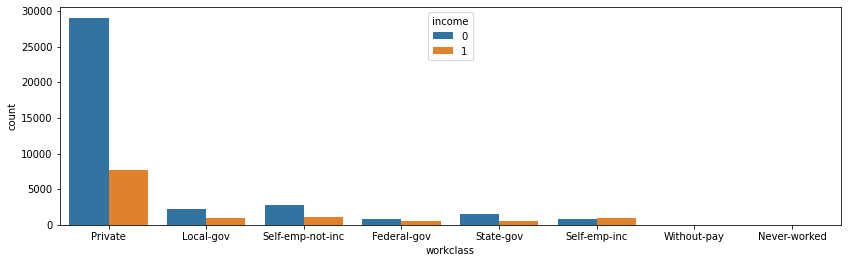

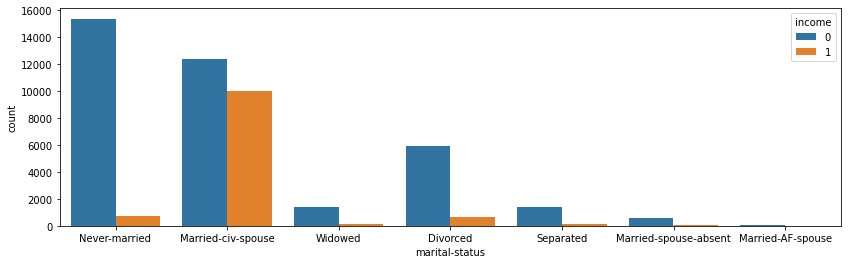

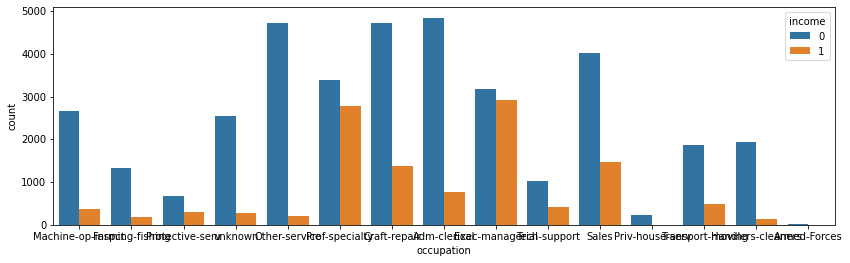

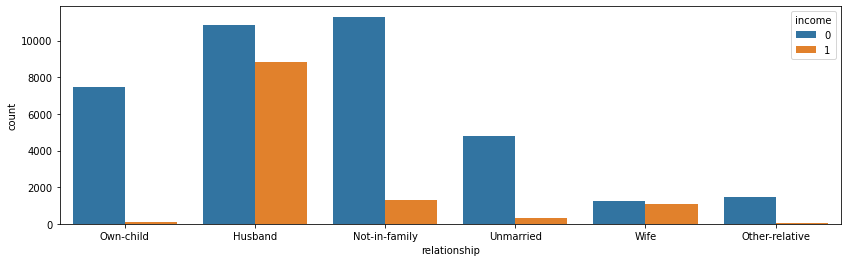

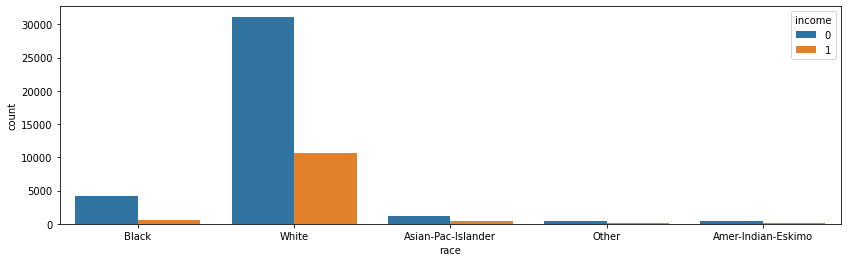

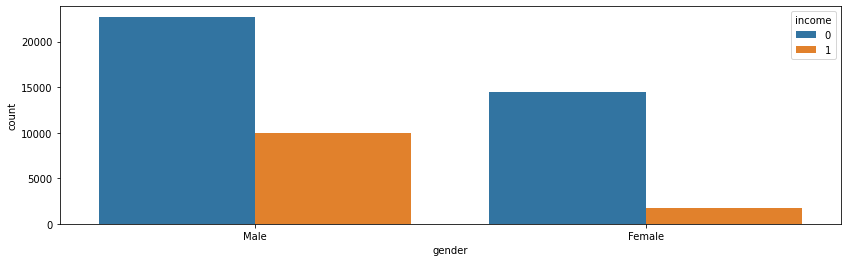

In [74]:
features_cat = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
for fea in features_cat: 
    plt.figure(figsize=(14, 4))
    total = float(len(data) )
    
    ax = sns.countplot(x=fea, data=data, hue="income")
    plt.xlabel(fea)
    plt.ylabel("count")
    plt.show()

## Summary:
    

* Features to be dropped for modeling

1. 'education-num' and 'education' are giving similar information. 'education' is going to be dropped.
2. 'capital-gain' and 'capital-loss' are mainly zeros, and not much useful for modeling. I will drop them. 
3. 'native-country' is mostly 'united-states'. It will be droped out for modeling.

* Features will be used for modeling: 
1. 'age', 'fnlwgt', 'educational-num', 'hours-per-week', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender'

More summary:

1. This dataset not balance , i.e. 76.1% of them are belong to income group 0 (who earns less than 50k) and 23.9% fall under the income group 1 (who earns more than 50k).

2. Females have more flexible working hours per week in the income groups who earns <=50k.

3. Males have more flexible working hours per week in the income groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per week. 

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.62% of all observations.
   But for male, 20.31% of all people earn more than 50k .

8. self-emp-inc workclass is only where more people earn >50k(belong to income group 1).

9. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).